In [1]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import cnn_model
import pickle
from sklearn.metrics import confusion_matrix


C:\Users\62819\anaconda3\envs\data-scientist\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import cv2

In [3]:
base = 'damagecar_dataset'
train_dir = os.path.join(base,'train')
test_dir = os.path.join(base,'test') 

The mean is ([0.4606, 0.4502, 0.4486]) and std is([0.2787, 0.2772, 0.2826])

In [7]:
transform = transforms.Compose(
    [transforms.Resize((128,128)),
    transforms.ToTensor(), 
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize((0.4606, 0.4502, 0.4486),(0.2787, 0.2772, 0.2826))]
)

In [8]:
test_transform = transforms.Compose(
    [transforms.Resize((128,128)),
     transforms.ToTensor(),
     transforms.Normalize((0.4606, 0.4502, 0.4486),(0.2787, 0.2772, 0.2826))]
     )

In [9]:
x_arr = np.random.randint(low=30,size=(3,3))

In [10]:
x_arr

array([[22, 29, 21],
       [28, 24,  9],
       [25, 22,  2]])

In [11]:
train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform = transform)
test_dataset = torchvision.datasets.ImageFolder(root=test_dir,transform=test_transform)
 

In [12]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=30, shuffle=True )
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=30,shuffle=True)
 

# EDA

In [13]:
examples = iter(train_loader)
samples,_ = next(examples)

In [10]:
samples.shape

torch.Size([30, 3, 128, 128])

In [1]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(samples[i][3])
    print(_[i])

NameError: name 'plt' is not defined

Blue-data

tensor(0)
tensor(1)
tensor(1)


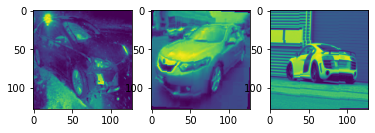

In [11]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(samples[i][2])
    print(_[i])

Green-data

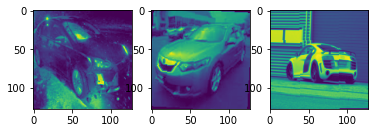

In [12]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(samples[i][1])

Red-data

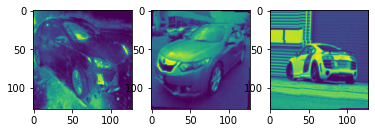

In [13]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(samples[i][0])

# Train

In [14]:
from os import path

model_path = "saved_model/damage_detection_model.sav"
if path.exists(model_path):
    model = pickle.load(open(model_path,'rb'))
else:
    model = cnn_model.CNN_model()
    model.train(train_loader, epochs=100, learning_rate = 0.001)
    pickle.dump(model,open(model_path,'wb'))

# Evaluate

In [15]:
y_pred,y_true = model.accuracy_score(test_loader)

Accuracy of the network: 82.609 %
Accuracy of damage: 81.30434782608695 %
Accuracy of whole: 83.91304347826087 %


In [16]:
cf = confusion_matrix(y_true,y_pred)

In [17]:
import seaborn as sns

group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)


<AxesSubplot:>

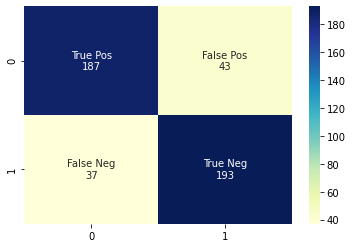

In [18]:
sns.heatmap(cf,annot=labels,fmt='',cmap='YlGnBu')

In [19]:
test_samples = next(iter(test_loader))

In [20]:
img =test_samples[0][1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


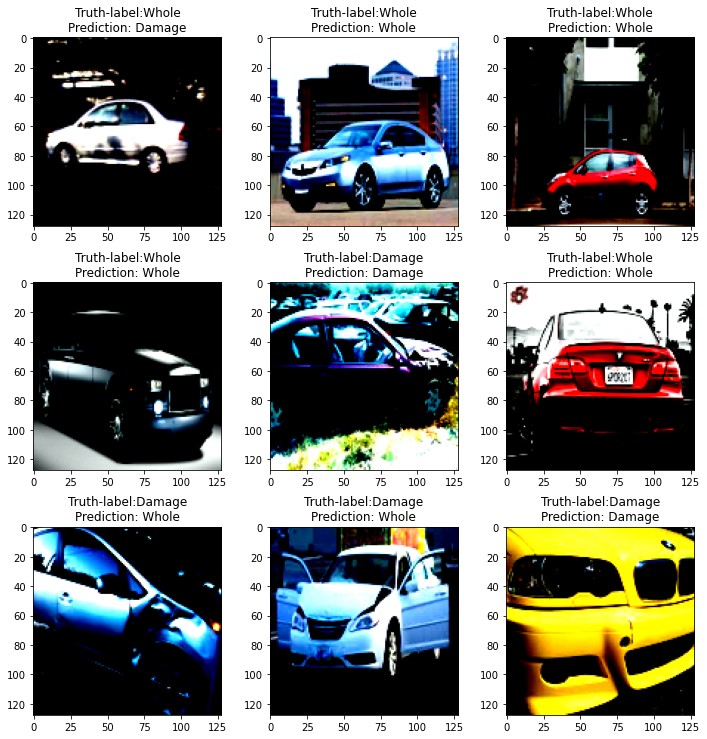

In [21]:
label = ["Damage","Whole"]

fig,axes = plt.subplots(3,3,figsize=(10,10))
fig.tight_layout()
fig.subplots_adjust(hspace=.30)

for i in range(3):
    for j in range(3):
        ax = axes[i,j]
        img = test_samples[0][i*3+j]
        net_input = img.reshape((1,3,128,128))
        truth = test_samples[1][i*3+j]
        prediction = model.predict(net_input)
        ax.set_title('Truth-label:%s\nPrediction: %s'%(label[truth].capitalize(),label[int(prediction)]))
        ax.imshow(img.permute(1,2,0))